In [ ]:
import json
import sys
sys.path.append('../py')
import myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
from matplotlib.gridspec import GridSpec
from matplotlib import ticker

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams['agg.path.chunksize'] = 10000

recalculate = recompile = True

In [133]:
params = dict(
    k = 1,
    h = 0.015,
    t_finish = 10,
    theta = 0.5,
    tau = 1.0,
    alpha = -1.
)

compiler_params = dict(
    EQ = "DDE_lin_1",
    RK = "RK98_",
    REAL = "float64",
    # TURN_OFF_INTERPOLATION = 1
)

script = "test/test_rk"

recompile=True
# recompile=False
        
hs, er, time = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

script = "test/test_rk_interpolation"
# prev_hs_d, prev_er_d = hs_d, er_d
hs_d, er_d = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    

~~~ ../cpp/test/test_rk.cpp is executed ~~~
~~~  parameters: {"k": 1, "h": 0.015, "t_finish": 10, "theta": 0.5, "tau": 1.0, "alpha": -1.0} ~~~
~~~ Computation took 0:0:2 (hh:mm:ss) ~~~
~~~ ../cpp/test/test_rk.cpp is finished ~~~
~~~ ../cpp/test/test_rk_interpolation.cpp is executed ~~~
~~~  parameters: {"k": 1, "h": 0.015, "t_finish": 10, "theta": 0.5, "tau": 1.0, "alpha": -1.0} ~~~
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
~~~ ../cpp/test/test_rk_interpolation.cpp is finished ~~~


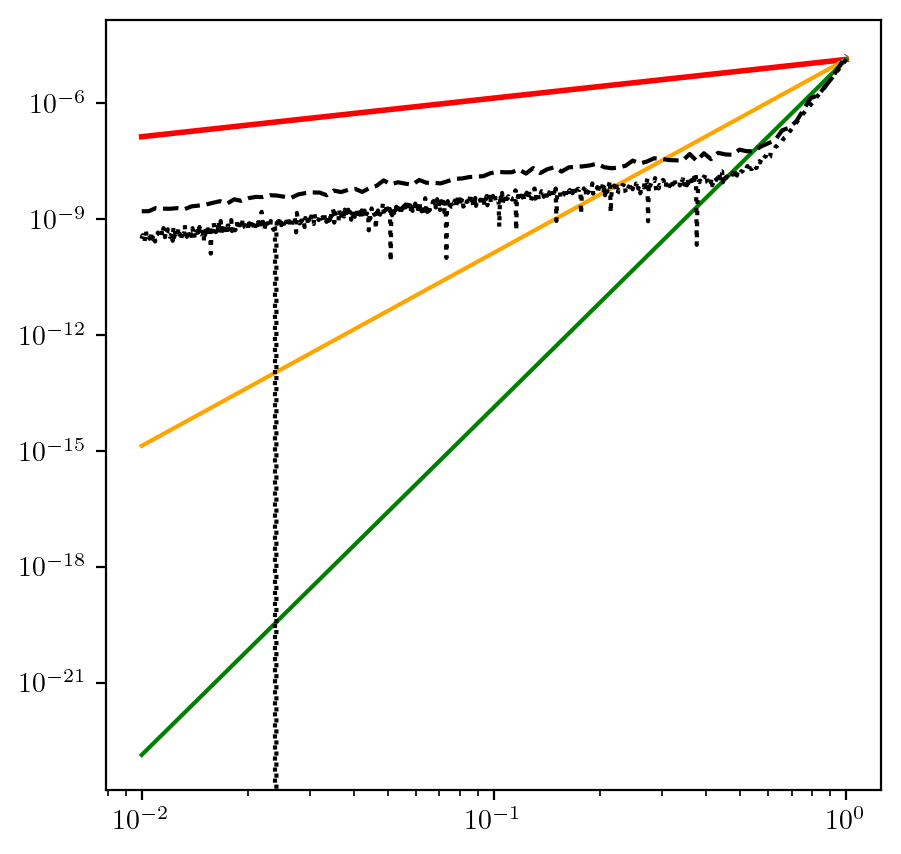

In [134]:
fig, ax = plt.subplots(1,1, figsize=(5,5),dpi=200)


ax.plot(hs, (hs)**1*er[-1]/hs[-1],c='r',lw=2)
# # ax.plot(hs, (hs)**3*er[-1]/hs[-1],c='y')
ax.plot(hs, (hs)**5*er[-1]/hs[-1],c='orange')
ax.plot(hs, (hs)**9*er[-1]/hs[-1],c='g')
# ax.plot(hs, (hs)**9*er[-1]/hs[-1],c='g')

ax.plot(hs,   er,   'k:')
ax.plot(hs_d, er_d, 'k--')
# ax.plot(prev_hs_d, prev_er_d*er[-1]/er_d[-1], 'b--')
# ax_time = ax.twiny()
# ax_time.set_xscale('log')
# ax_time.plot(1/time, er, c='cyan')


ax.set_xscale('log')
ax.set_yscale('log')



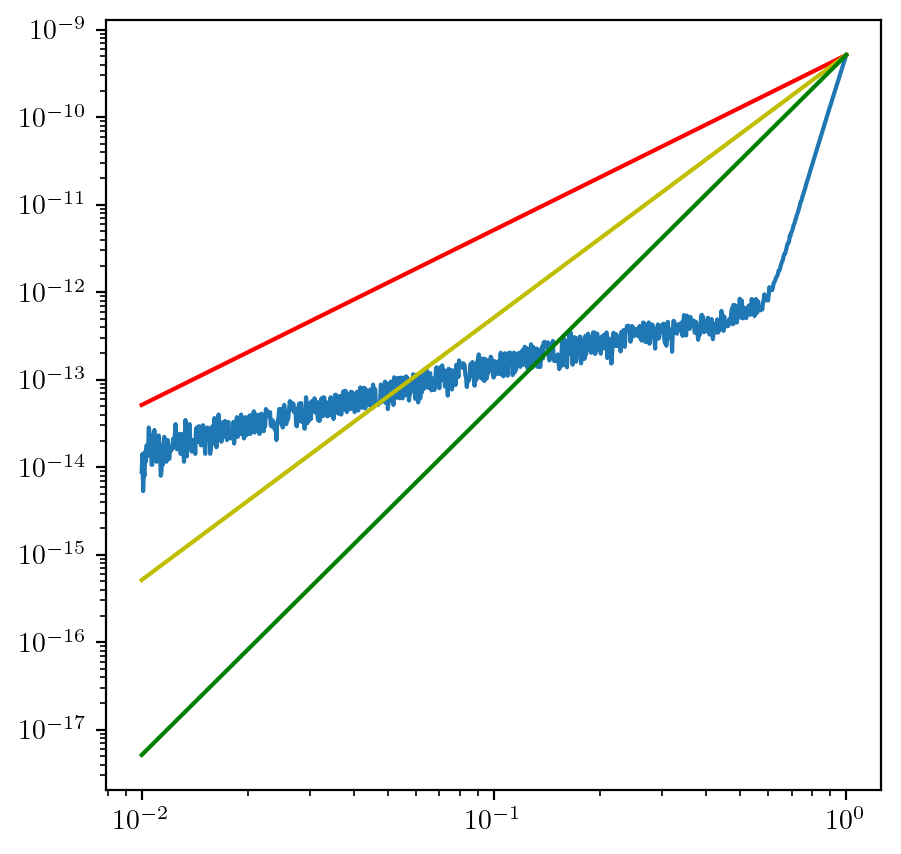

In [103]:
fig, ax = plt.subplots(1,1, figsize=(5,5),dpi=200)
ax.plot(hs, er)

ax.plot(hs, (hs)**2*er[-1]/hs[-1],c='r')
ax.plot(hs, (hs)**3*er[-1]/hs[-1],c='y')
ax.plot(hs, (hs)**4*er[-1]/hs[-1],c='g')

# ax_time = ax.twiny()
# ax_time.set_xscale('log')
# ax_time.plot(1/time, er, c='cyan')


ax.set_xscale('log')
ax.set_yscale('log')

In [127]:
params = dict(
    k = 1.,
    alpha = -1.,
    # tau = 10,
    h = 0.01,
    t_finish = 10,
    theta = 0.,
    tau = 1.0,
)
compiler_params = dict(
    EQ = "DDE_lin_1",
    # RK = "RK98_"
    # RK = "RK_DormandPrince1980"
)
script = "solution_dense"

recompile=True
        
t, x, x_true = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")    





~~~ ../cpp/solution_dense.cpp is executed ~~~
~~~  parameters: {"k": 1.0, "alpha": -1.0, "h": 0.01, "t_finish": 10, "theta": 0.0, "tau": 1.0} ~~~
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
~~~ ../cpp/solution_dense.cpp is finished ~~~


(0.0, 0.03)

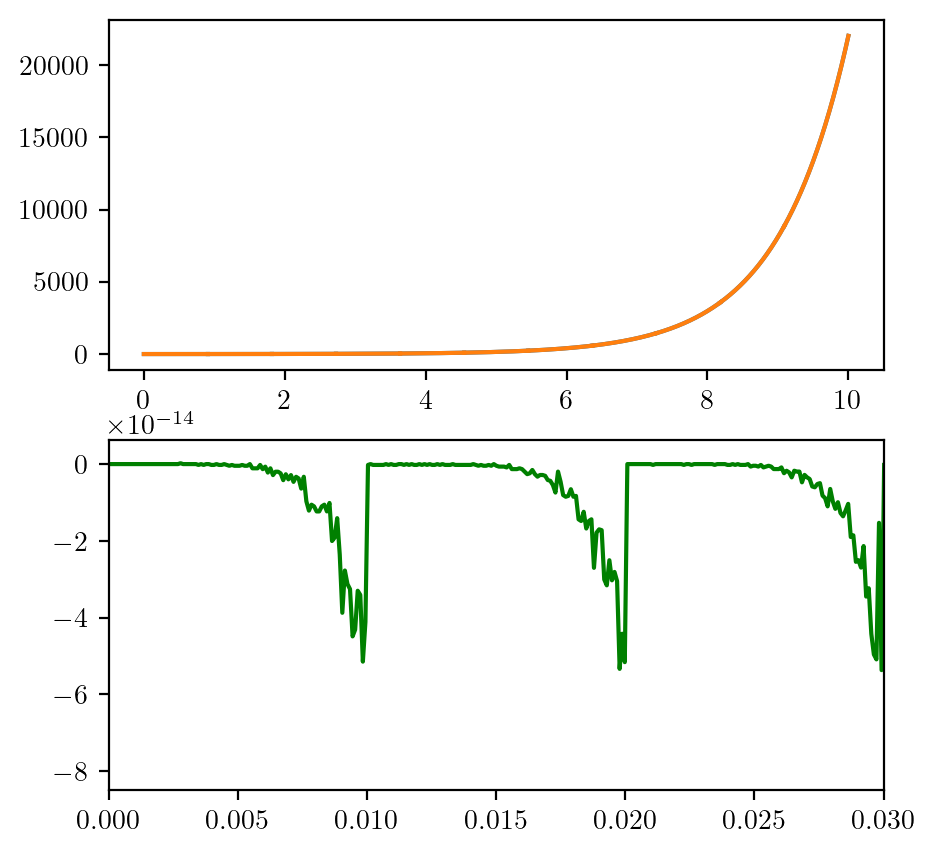

In [128]:

fig, ax = plt.subplots(2,1, figsize=(5,5),dpi=200)

ax[0].plot(t, x)
ax[0].plot(t, x_true)
ax[1].plot(t, (x - x_true)/x_true, c='g')
#
ax[1].set_xlim(0,3*params["h"])

In [38]:
params = dict(
    k = 1.,
    h = 0.01,
    t_finish = 10,
    choice = "d",
    alpha = 111,
    beta = 21,
    gamma = 31
)

compiler_params = dict(
    X = 'alpha',
    REAL = 'float128'
)

script = "test/test"
        
my.run_cpp(script, params, compiler_params = compiler_params, has_output=False, recalculate=recalculate, recompile=recompile, flags = "-O3")    

# 0.1234567...9104328155517578125
# 0.12345678901234567...736988623209981597028672695159912109375
# 0.123456789012345678901...321800735590983322254032827913761138916015625

~~~ ../cpp/test/test.cpp is executed ~~~
~~~  parameters: {"k": 1.0, "h": 0.01, "t_finish": 10, "choice": "d", "alpha": 111, "beta": 21, "gamma": 31} ~~~
0
0
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
~~~ ../cpp/test/test.cpp is finished ~~~


~~~ ../cpp/test_polynomial.cpp is executed ~~~
~~~  parameters: {"a0": 1, "a1": 1, "a2": 3, "a3": -5} ~~~
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
~~~ ../cpp/test_polynomial.cpp is finished ~~~


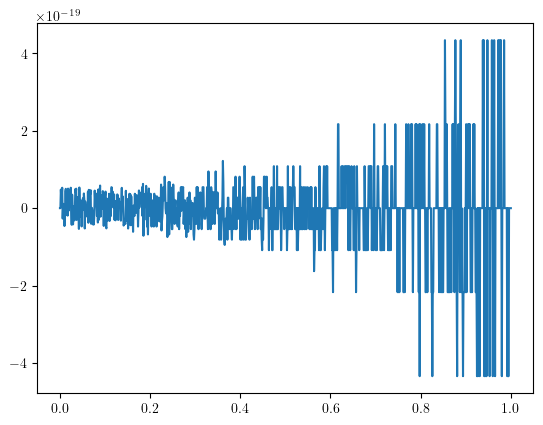

In [886]:
params = dict(
    a0 = 1,
    a1 = 1,
    a2 = 3,
    a3 = -5
)
compiler_params = dict()
script = "test_polynomial"

recompile=True
# recompile=False
        
ts, xs = my.run_cpp(script, params, compiler_params, recalculate=recalculate, recompile=recompile, flags = "-O3")

# plt.plot(ts, xs)
# plt.plot(ts, params["a0"] + ts*params["a1"] + ts**2 * params["a2"] + ts**3 * params["a3"])
plt.plot(ts, -xs + params["a0"] + ts*params["a1"] + ts**2 * params["a2"] + ts**3 * params["a3"])

In [ ]:
AS = """
a2,1 = 1/46 a3,1 = −0.11698050118114486205818241524969622
a3,2 = 0.21327631165914552875931243204789548 a4,1 = 0.03611092892925025001292375629932472
a4,3 = 0.10833278678775075003877126889797416 a5,1 = 1.57329743908138605107331820072051125
a5,3 = −5.98400943754042002888532938159655553 a5,4 = 4.93277082198844574251789353381722074
a6,1 = 0.05052046351120380909008334360006234 a6,4 = 0.17686653884807108146683657390397612
a6,5 = 0.00103743376935980522339467349390418 a7,1 = 0.10543148021953768958529340893598138
a7,4 = −0.16042415162569842979496486916719383 a7,5 = 0.11643956912829316045688724281285250
a7,6 = 0.48215663817720491194449759844838932 a8,1 = 0.07148407148407148407148407148407148
a8,6 = 0.32971116090443908023196389566296464 a8,7 = 0.24216141096813279233990867620960722
a9,1 = 0.07162368881118881118881118881118881 a9,6 = 0.32859867301674234161492268975519694
a9,7 = 0.11622213117906185418927311444060725 a9,8 = −0.03392701048951048951048951048951048
a10,1 = 0.04861540768024729180628870095388582 a10,6 = 0.03998502200331629058445317782406268
a10,7 = 0.10715724786209388876739304914053506 a10,8 = −0.02177735985419485163815426357369818
a10,9 = −0.10579849950964443770179884616296721 a11,1 = −0.02540141041535143673515871979014924
a11,6 = 1/30 a11,7 = −0.16404854760069182073503553020238782
a11,8 = 0.03410548898794737788891414566528526 a11,9 = 0.15836825014108792658008718465091487
a11,10 = 0.21425115805975734472868683695127609 a12,1 = 0.00584833331460742801095934302256470
a12,6 = −0.53954170547283522916525526480339109 a12,7 = 0.20128430845560909506500331018201158
a12,8 = 0.04347222773254789483240207937678906 a12,9 = −0.00402998571475307250775349983910179
a12,10 = 0.16541535721570612771420482097898952 a12,11 = 0.79491862412512344573322086551518180
a13,1 = −0.39964965968794892497157706711861448 a13,6 = −3.79096577568393158554742638116249372
a13,7 = −0.40349325653530103387515807815498044 a13,8 = −2.82463879530435263378049668286220715
a13,9 = 1.04226892772185985533374283289821416 a13,10 = 1.12510956420436603974237036536924078
a13,11 = 3.32746188718986816186934832571938138 a13,12 = 2.77897957186355606325818219255783627
a14,1 = 0.39545306350085237157098218205756922 a14,6 = 5.82534730759650564865380791881446903
a14,7 = −0.36527452339161313311889856846974452 a14,8 = 1.18860324058346533283780076203192232
a14,9 = 0.57970467638357921347110271762687972 a14,10 = −0.86824862589087693262676988867897834
a14,11 = −5.20227677296454721392873650976792184 a14,12 = −0.79895541420753382543211121058675915
a14,13 = 0.14360623206363792632792463778889008
a15,1 = 8.49173149061346398013352206978380938 a15,6 = 86.32213734729036800877634194386790750
a15,7 = 1.02560575501091662034511526187393241 a15,8 = 85.77427969817339941806831550695235092
a15,9 = −13.98699305104110611795532466113248067 a15,10 = −20.71537405501426352265946477613161883
a15,11 = −72.16597156619946800281180102605140463 a15,12 = −76.71211139107806345587696023064419687
a15,13 = 4.22319427707298828839851258893735507 a15,14 = −1.25649850482823521641825667745565428
a16,1 = −0.42892119881959353241190195318730008 a16,6 = −9.16865700950084689999297912545025359
a16,7 = 1.08317616770620939241547721530003920 a16,8 = −1.23501525358323653198215832293981810
a16,9 = −1.21438272617593906232943856422371019 a16,10 = 1.37226168507232166621351243731869914
a16,11 = 9.15723239697162418155377135344394113 a16,12 = 1.30616301842220047563298585480401671
a16,13 = −0.25285618808937955976690569433069974 a16,14 = 0.38099910799663987066763679926508552"""

import re

AS_split = AS.replace('\n',"").replace(' ',"").split("a")[1:]
AS_dict = dict()
for s in AS_split:
    # print(s)
    I, value = s.split("=")
    AS_dict[I] = value

# print(AS_dict)
result = ""
for i in range(1,16+1):
    result += "{"
    for j in range(1, i):
        I = f'{i},{j}'
        if I in AS_dict:
            result += AS_dict[I]
        else:
            result += "0."
        if j < i-1:
            result += ", "
    result += "}"
    if i < 16:
        result += ",\n"
print(result)

In [ ]:
A_18_19 = """1 0.011432648061626831484473526087708431 0.013665530501599309301667313024545549
8 −0.25910015109834286167182847913811052 −0.30703861145677111921271332186217225
9 0.26112279003556667442851494524453053 0.25209531563572099623089165079301459
10 0.13603667739783981942567006544587345 0.13108277539906970515311706137497176
11 0.21092629039215214634081204784167201 0.21767739046525384968495567501048449
12 0.38561044391652919964360639985117800 0.44086627030905856048873271907826814
14 −0.0066120753217415785069185723457661197 0.036713802867286798088711574468169594
15 0. −0.00045263428475531956819180895665607424
16 −0.025491612884353702222118053281571882 −0.0075219364917745459172150727107695996
17 0.027512197954444024676795158249911643 0.0038178169251348210565771097937455971
18 0. 0.074520142349051742400516673742958887""".replace("−", "-")

A_20_21 = """1 0.014268631497102842453094099400571112 0.013154167847783023947787964293933914
8 −0.24769768181800691975188712358712399 −0.34064115650712902848454767806522149
9 0.23928330553460883713418088067890939 0.22802117967789421808187939123391075
10 0.12957572153718905740865524351757453 0.13228168138941728498745754543959846
11 0.22078879969474376788381528067483098 0.21597957165624687772098521823642410
12 0.36428486485822390774749367125266646 0.51134550887345867838216854890276241
14 0.0078316665904274240545668452142219710 0.13917551936854006335051797420701257
15 0.000066960723091763590089655760622436567 −0.0031263601232930086179660228833873655
16 −0.014794348323796745679860880371768882 0.026185109965277331546702382098973556
17 0.013398599455567821157189637776957067 −0.033417534733963503459105659672079059
18 −0.085614642709593809011748490099335927 0.070815965257295717659359220856222485
19 0.00040934649811497276726885169474090132 −0.20353982182996909215211745048425036
20 0. −0.24770863310964368488502368393967138"""

for AS, i in zip([A_18_19, A_20_21], [18, 20]):
    AS_split = AS.split("\n")
    AS
    for s in AS_split:
        j, a1, a2 = s.split(" ")
        AS_dict[f"{i},{j}"] = a1
        AS_dict[f"{i+1},{j}"] = a2
        


    
result = ""
for i in range(1,21+1):
    result += "{"
    for j in range(1, i):
        I = f'{i},{j}'
        if I in AS_dict:
            result += AS_dict[I]
        else:
            result += "0."
        if j < i-1:
            result += ", "
    result += "}"
    if i < 21:
        result += ",\n"
print(result)

In [ ]:
b_1_8 = """1 1. 0.
2 −11.973451765066176560361311018226 43.2795603711957663314640687334784
3 61.8659433341341457414546419674870 −388.643615010266767652241553817573
4 −172.191284938824966462131456884724 1375.36134238344386516425494248983
5 278.420601619157308482597286774406 −2531.74963787167223481762103223525
6 −262.245961078958633613414158509672 2582.71150241910928426677685824245
7 133.625523142029815164255629875140 −1389.71139150818241656595496272621
8 −28.4864612916517081421757960333860 308.548158769451961760738188103935"""
b_9_10 = """2 −35.949229157515841308693212522485 14.507768855561170577399510684864115
3 344.66007145267323793304701239612813 −102.87334506907882369949499181653257
4 −1277.8231161852588793034483568957163 325.73620934962310722589632000654494
5 2438.4531969414645043419415426301071 −564.41475401881182444339789500457423
6 −2556.6772649423957779426859557911790 554.71818449744478179630222860534829
7 1403.5145365712080540414467219761373 −290.79278746482763407938150032377714
8 −315.94918029416959328896002709962148 63.246729432600696379368409963863892"""
b_11_12 = """2 −2.1094695519024646598908782765362982 −100.79375011459739760440959274234003
3 55.988251954788337958191095236032033 912.99125305463925121088944961549543
4 −264.61413210699096652631586537232704 −3280.6831578813275712931303068459504
5 565.65822385064758881538103386820147 6130.8565731590057666459772117731737
6 −633.38091626406568414487604426248265 −6333.8123210002439365588445068616605
7 362.74969708930989760924384724524554 3440.7580426866649922779331052966786
8 −84.067848703326167615235487768568199 −768.92110825120410413420983634383248"""
b_13_14 = """2 −25.440507894872984550500436028067427 −53.044523766668953990865348337508229
3 231.56721238732705115521555888748081 472.06731168152030494976872425589296
4 −848.88135982430316686960349357413705 −1690.9474431179622415653053379847580
5 1619.4601461226664780921682769195806 3162.7606215432605215020698402851890
6 −1701.9954814871161810970517626589562 −3273.1311367235474224182518161777664
7 936.37628107675280541866295974978827 1780.7160806537701180827154030095558
8 −211.03212391286593233692541965030535 −398.29399587384786752327503119748342"""
b_15_16 = """2 0.069532904885953224280647815866529446 −16.273632561649042928632428258068406
3 −0.40836619698511108536380100612280752 144.74446484804145579419767803825056
4 0.64705882352941176470588235294117647 −520.09470500289185114515502593304132
5 0.13333333333333333333333333333333333 976.29689823342511601988001923608264
6 −1.2439024390243902439024390243902439 −1013.5010685886085561530538390289585
7 1.12 552.66779813432517968595841956802430
8 −0.31818181818181818181818181818181818 −123.80749699812617224093675910616022"""
b_17_18 = """2 20.625755176470875784534420237574253 −18.817476339237677341178965829020625
3 −186.72916690449931142805675512305950 53.566894625827769435485862257588867
4 684.34772688713531787857778116836424 250.05378570526817398980893871953673
5 −1313.8347634052464295313536128170233 −1346.8731688430031688644084422339689
6 1399.2597557186831307119727893837642 2334.7953069475911713312956770826992
7 −785.51482530649694191111861080006356 −1784.1158652809583151589572986554593
8 181.84551783395335849544398795044363 511.39052318451204660795422865862401"""
b_19_20 = """2 97.969961339224266808139818666364240 53.970113384226006859242965978811408
3 −844.22675982692345551884024227615845 −344.55913008769394871758868793496691
4 2908.4744283151958608474176819245470 709.14543312174029933838356908142433
5 −5186.9509883693411284355665884018688 −331.18678744759622490444568444043506
6 5068.1629115433598517009851177503704 −656.83707406929786479256385513892002
7 −2576.0565401402080847395788986107157 869.62774812753690937741613107541400
8 532.62698713869268933744311094746128 −300.16030302891517716044443862132775"""
b_21 = """2 33.979349119946499359470740895293897 0.
6 4493.1774654670702271573117063893514 0.
3 −410.01102024350413607666399067994239 0.
7 −2654.9642977809243792026409466797540 0.
4 1801.4692144716236069560447277474610 0.
8 633.37878381307778804303305201453814 0.
5 −3897.0294948472896062365552896869481 0."""

b_dict = dict()
for b, (i1, i2) in zip([b_1_8, b_9_10, b_11_12, b_13_14, b_15_16, b_17_18, b_19_20, b_21], 
                       [(1,8), (9,10), (11,12), (13,14), (15,16), (17,18), (19,20), (21, 999)]):
    b_split = b.split("\n")
    for b_s in b_split:
        # print(i1, b_s.split(" "))
        j, bi1j, bi2j = b_s.split(" ")
        b_dict[f"{i1},{j}"] = bi1j
        b_dict[f"{i2},{j}"] = bi2j
    
result = "{\n"
for i in range(1,21+1):
    result += "array{"
    for j in range(0, 8+1):
        I = f'{i},{j}'
        if I in b_dict:
            result += b_dict[I]
        else:
            result += "0."
        if j != 8:
            result += ", "
    result += "}"
    if i != 21:
        result += ",\n"
result += "}"
print(result.replace("−", "-"))

In [808]:
text = """#pragma once

#include <vector>
#include "polynomial.hpp"

using namespace std;

/*
{
{}
{1}
{1,2}
{1,2,3}
}
*/

// struct RK_TABLE {
//     static const int s = 3;
//     array<Real, s*(s-1)/2> A_flat;
// };



struct RK_Euler {
    /*
    #   Euler   #
    */
    static const int s = 1;
    const array<array<Real, s-1>, s> A = 
        {{}};
    const array<Real, s> C =
        {0};
    const array<Real, s> B =
        {1};
    const array<Polynomial<1>, s> BB =
        {{{0., 1.}}};
   
};

// struct RK4_classic {
//     /*
//     #   RK4   #
//     */
//     inline static const int s = 4;
//     inline static const vector<vector<Real>> A = 
//         {{}, 
//          {1./2.}, 
//          {0.,     1./2.}, 
//          {0.,     0.,      1.}};
//     inline static const vector<Real> C =
//         {0,
//          1./2.,
//          1./2.,
//          1.};
//     inline static const vector<Real> B =
//         {1./6., 1./3., 1./3., 1./6.};
//     inline static const vector<Polynomial<1>> BB =
//         {array{0., 1./6.}, array{0., 1./3.}, array{0., 1./3.}, array{0., 1./6.}}; // linear interpolation coefficients from low to high power
// };

// struct RK_DormandPrince1980 {
//     // from BAKER, CHRISTOPHER T. H.; PAUL, CHRISTOPHER A. H. . (1994). Computing stability regions—Runge-Kutta methods for delay differential equations.     doi:10.1093/imanum/14.3.347 
//     // due to Shampine (1986)
    
//     inline static const int s = 9;
//     inline static const vector<vector<Real>> A = 
//     {
// {},
// {1./5.},
// {3./40.          , 9./40.},
// {44./45.         , -56./15.     , 32./9.},
// {19372./6561.    , -25360./2187., 64448./6561.     , -212./729.},
// {9017./3168.     , -355./33.    , 46732./5247.     , 49./176.          , -5103./18656.},
// {35./384.        , 0.           , 500./1113.       , 125./192.         , -2187./6784.   , 11./84.        },
// {-33728713./104693760., 2., -30167461./21674880., 7739027./17338960., -19162737./123305984., 0., -26949./363520.},
// {7157./75776., 0., 70925./164724., 10825./113664., -220887./4016128., 80069./3530688., -107./5254., -5./74.}
// // {6245./62208.    , 0.           , 8875./103032.    , -125./1728.       , 801./13568.    , -13519./368064.    , 11105./368064.  },
// // {632855./4478976., 0.           , 4146875./6391016., 5390625./14183424., -15975./108544., 8295925./220286304., -1779595./62938944., -805./4104.}
//     };
//     inline static const vector<Real> C =
//         {0,
//         1./5.,
//         3./10.,
//         4./5.,
//         8./9.,
//         1.,
//         1.,
//         1./2.,
//         1./2.};
//     inline static const vector<Real> B =
//         {35./384.,0.,500./1113.,125./192.,-2187./6784.,11./84., 0., 0.,0.};
//     inline static const vector<Polynomial<5>> BB =
//         {
//         array{0., 1., -6839./1776., 24433./3552., -81685./14208., 29./16.},
//         array{0., 0., 0., 0., 0., 0.},
//         array{0., 0., 413200./41181., -398800./13727., 1245700./41181., -4000./371.},
//         array{0., 0., 225./37., -44725./1776., 83775./2368., -125./8.},
//         array{0., 0., -98415./31376., 798255./62752., -4428675./251008., 6561./848.},
//         array{0., 0., 23529./18389., -285659./55167., 527571./73556., -22./7.},
//         array{0., 0., -3483./2627., 14847./2627., -21872./2627., 4.},
//         array{0., 0., -40./37., 80./37., -40./37., 0.},
//         array{0., 0., -8., 32., -40., 16.}
//         };
// };

// struct RK5_4_7FM {
//     /*
//     #   RK4   #
//     */
//     inline static const int s = 9;
//     inline static const vector<vector<Real>> A = 
//     {
// {},
// {1./5.},
// {3./40.          , 9./40.},
// {44./45.         , -56./15.     , 32./9.},
// {19372./6561.    , -25360./2187., 64448./6561.     , -212./729.},
// {9017./3168.     , -355./33.    , 46732./5247.     , 49./176.          , -5103./18656.},
// {35./384.        , 0.           , 500./1113.       , 125./192.         , -2187./6784.   , 11./84.        },
// {6245./62208.    , 0.           , 8875./103032.    , -125./1728.       , 801./13568.    , -13519./368064.    , 11105./368064.  },
// {632855./4478976., 0.           , 4146875./6391016., 5390625./14183424., -15975./108544., 8295925./220286304., -1779595./62938944., -805./4104.}
//     };
//     inline static const vector<Real> C =
//         {0,
//         1./5.,
//         3./10.,
//         4./5.,
//         8./9.,
//         1.,
//         1.,
//         1./6.,
//         5./6};
//     inline static const vector<Real> B_hat =
//         {5179./57600., 0., 7571./16695., 393./640., -92097./339200., 187./2100., 1./40., 0., 0.};
//     inline static const vector<Real> B =
//         {35./384.,0.,500./1113.,125./192.,-2187./6784.,11./84.,0., 0., 0.};
//     inline static const vector<Polynomial<5>> BB =
//         {array{0., 1., -38039./7040., 125923./10560., -19683./1760., 3303./880.},
//          array{0., 0., 0., 0., 0., 0., },
//          array{0., 0., -12500./4081., 205000./12243., -90000./4081., 36000./4081.}, 
//          array{0., 0., -3125./704., 25625./1056., -5625./176., 1125./88.},
//          array{0., 0., 164025./74624., -448335./37312., 295245./18656., -59049./9328.},
//          array{0., 0., -25./28., 205./42., -45./7., 18./7.},
//          array{0., 0., -2./11., 73./55., -171./55., 108./55.},
//          array{0., 0., 189./22., -1593./55., 3537./110., -648./55.},
//          array{0., 0., 351./110., -999./55., 2943./110., -648./55.}};
// };

// template <>
// struct RK<RK_method::RK5_4_7M> {
//     /*
//     #   J.R. Dormand & P.J. Prince, A family of embedded Runge-Kutta formulae, J. Comp. Appl. Math.,
// 6 (1980), pp. 19–26.
//     */
//     static const int s = 9;
//     const vector<vector<Real>> A = 
//     {
// {},
// {1./5.},
// {3./40.          , 9./40.},
// {44./45.         , -56./15.     , 32./9.},
// {19372./6561.    , -25360./2187., 64448./6561.     , -212./729.},
// {9017./3168.     , -355./33.    , 46732./5247.     , 49./176.          , -5103./18656.}, 
// {35./384.        , 0.           , 500./1113.       , 125./192.         , -2187./6784.   , 11./84. }
//     };
//     const vector<Real> C =
//         {0,
//         1./5.,
//         3./10.,
//         4./5.,
//         8./9.,
//         1.,
//         1. };
//     const vector<Real> B =
//         {5179./57600., 0., 7571./16695., 393./640., -92097./339200., 187./2100., 1./40.};
//     const vector<Real> B_hat =
//         {35./384.,0.,500./1113.,125./192.,-2187./6784.,11./84.,0.};
// };



// struct RK_ZERO {
//     /*
//     #   RK4   #
//     */
//     static const int s = 1;
//     const array<array<Real, s-1>, s> A = 
//         {{}};
//     const array<Real, s> C =
//         {0};
//     const array<Real, s> B =
//         {0};
//     const array<Polynomial<0>, s> BB =
//         {{0.}};
// };





// struct RK98 {
//     /*
//     #   RK4   #
//     */
//     inline static const int s = 16;
//     inline static const vector<vector<Real>> A = 
//     {
// {},
// {1./46.},
// {-0.11698050118114486205818241524969622, 0.21327631165914552875931243204789548},
// {0.03611092892925025001292375629932472, 0., 0.10833278678775075003877126889797416},
// {1.57329743908138605107331820072051125, 0., -5.98400943754042002888532938159655553, 4.93277082198844574251789353381722074},
// {0.05052046351120380909008334360006234, 0., 0., 0.17686653884807108146683657390397612, 0.00103743376935980522339467349390418},
// {0.10543148021953768958529340893598138, 0., 0., -0.16042415162569842979496486916719383, 0.11643956912829316045688724281285250, 0.48215663817720491194449759844838932},
// {0.07148407148407148407148407148407148, 0., 0., 0., 0., 0.32971116090443908023196389566296464, 0.24216141096813279233990867620960722},
// {0.07162368881118881118881118881118881, 0., 0., 0., 0., 0.32859867301674234161492268975519694, 0.11622213117906185418927311444060725, -0.03392701048951048951048951048951048},
// {0.04861540768024729180628870095388582, 0., 0., 0., 0., 0.03998502200331629058445317782406268, 0.10715724786209388876739304914053506, -0.02177735985419485163815426357369818, -0.10579849950964443770179884616296721},
// {-0.02540141041535143673515871979014924, 0., 0., 0., 0., 1./30., -0.16404854760069182073503553020238782, 0.03410548898794737788891414566528526, 0.15836825014108792658008718465091487, 0.21425115805975734472868683695127609},
// {0.00584833331460742801095934302256470, 0., 0., 0., 0., -0.53954170547283522916525526480339109, 0.20128430845560909506500331018201158, 0.04347222773254789483240207937678906, -0.00402998571475307250775349983910179, 0.16541535721570612771420482097898952, 0.79491862412512344573322086551518180},
// {-0.39964965968794892497157706711861448, 0., 0., 0., 0., -3.79096577568393158554742638116249372, -0.40349325653530103387515807815498044, -2.82463879530435263378049668286220715, 1.04226892772185985533374283289821416, 1.12510956420436603974237036536924078, 3.32746188718986816186934832571938138, 2.77897957186355606325818219255783627},
// {0.39545306350085237157098218205756922, 0., 0., 0., 0., 5.82534730759650564865380791881446903, -0.36527452339161313311889856846974452, 1.18860324058346533283780076203192232, 0.57970467638357921347110271762687972, -0.86824862589087693262676988867897834, -5.20227677296454721392873650976792184, -0.79895541420753382543211121058675915, 0.14360623206363792632792463778889008},
// {8.49173149061346398013352206978380938, 0., 0., 0., 0., 86.32213734729036800877634194386790750, 1.02560575501091662034511526187393241, 85.77427969817339941806831550695235092, -13.98699305104110611795532466113248067, -20.71537405501426352265946477613161883, -72.16597156619946800281180102605140463, -76.71211139107806345587696023064419687, 4.22319427707298828839851258893735507, -1.25649850482823521641825667745565428},
// {-0.42892119881959353241190195318730008, 0., 0., 0., 0., -9.16865700950084689999297912545025359, 1.08317616770620939241547721530003920, -1.23501525358323653198215832293981810, -1.21438272617593906232943856422371019, 1.37226168507232166621351243731869914, 9.15723239697162418155377135344394113, 1.30616301842220047563298585480401671, -0.25285618808937955976690569433069974, 0.38099910799663987066763679926508552, 0.}
//     };
//     inline static const vector<Real> C =
//     {
//       0.00000000000000000000000000000000000 
//     , 0.02173913043478260869565217391304347 , 0.09629581047800066670113001679819925
//     , 0.14444371571700100005169502519729888 , 0.52205882352941176470588235294117647
//     , 0.22842443612863469578031459099794265 , 0.54360353589933733219171338103002937
//     , 0.64335664335664335664335664335664335 , 0.48251748251748251748251748251748251
//     , 0.06818181818181818181818181818181818 , 0.25060827250608272506082725060827250
//     , 0.66736715965600568968278165443304378 , 0.85507246376811594202898550724637681
//     , 0.89795918367346938775510204081632653 , 1.
//     , 1.};
//     const vector<Real> B_hat = {
//       0.00653047880643482012034413441159249  , 0.00000000000000000000000000000000000
//     , 0.00000000000000000000000000000000000  , 0.00000000000000000000000000000000000
//     , 0.00000000000000000000000000000000000  , 0.00000000000000000000000000000000000
//     , 0.00000000000000000000000000000000000  ,-2.31471038197461347517552506241529830
//     , 0.43528227238866280799530900822377013  , 0.14907947287101933118545845390618763
//     , 0.17905535442235532311850533252768020  , 2.53400872222767706921176214508820825
//     ,-0.55430437423209112896721332268159015  , 0.56924788787870083224213506297615260
//     ,-0.03644749690427461198884026816573513  , 1./31.
//     };
//     inline static const vector<Real> B =
//         {
//       0.01490902081978461022483617102382552  , 0.00000000000000000000000000000000000
//     , 0.00000000000000000000000000000000000  , 0.00000000000000000000000000000000000
//     , 0.00000000000000000000000000000000000  , 0.00000000000000000000000000000000000
//     , 0.00000000000000000000000000000000000  ,-0.20408044692054151258349120934134791
//     , 0.22901438600570447264772469337066476  , 0.12800558251147375669208211573729202
//     , 0.22380626846054143649770066956485937  , 0.39553165293700054420552389156421651
//     , 0.05416646758806981196568364538360743  , 0.12691439652445903685643385312168037
//     ,-0.00052539244262118876455834655383035  , 1./31.};
    
//     inline static const vector<Polynomial<1>> BB =
//     {
//         array{0.,B[0]}, 
//         array{0.,B[1]}, 
//         array{0.,B[2]}, 
//         array{0.,B[3]}, 
//         array{0.,B[4]}, 
//         array{0.,B[5]}, 
//         array{0.,B[6]}, 
//         array{0.,B[7]}, 
//         array{0.,B[8]}, 
//         array{0.,B[9]}, 
//         array{0.,B[10]}, 
//         array{0.,B[11]}, 
//         array{0.,B[12]}, 
//         array{0.,B[13]}, 
//         array{0.,B[14]}, 
//         array{0.,B[15]}
//     };
// };


















struct RK98_ {
    /*
    #   RK4   #
    */
    inline static const int s = 16;
    inline static const vector<vector<Real>> A = 
        {{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.02173913043478260869565217391304347826086956521739130434782608695652173913043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{-0.11698050118114486205818241524969622410384223979749965805696164405165374068545,0.21327631165914552875931243204789548369469882662605540205429350381508117932416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.03611092892925025001292375629932472234657122006070840400030170773646916878204,0,0.10833278678775075003877126889797416703971366018212521200090512320940750634611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{1.57329743908138605107331820072051125641643664351842805209769690028102798657659,0,-5.98400943754042002888532938159655553518127689802844787698990227392475614910376,4.93277082198844574251789353381722074935307554862766688366377625231796145777087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.05052046351120380909008334360006234635511181026904002251194423118941950046497,0,0,0.17686653884807108146683657390397612041041458603581793182438474501847191168463,0.00103743376935980522339467349390418494016089864590172962507499344829031727187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.10543148021953768958529340893598138847228076756096566564586860869775529231537,0,0,-0.16042415162569842979496486916719383758722635620697602559102345943091722514966,0.11643956912829316045688724281285250393566139141568280111760708666061015359453,0.48215663817720491194449759844838932144562487430753990276750905332820882466184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.07148407148407148407148407148407148407148407148407148407148407148407148407149,0,0,0,0,0.32971116090443908023196389566296464803047147789829324999429860673704318583012,0.24216141096813279233990867620960722454140109397427862246588264600357052639983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.07162368881118881118881118881118881118881118881118881118881118881118881118881,0,0,0,0,0.32859867301674234161492268975519694162614616072449015216348529457960819195682,0.11622213117906185418927311444060725417804964347131404372371681988432044678195,-0.03392701048951048951048951048951048951048951048951048951048951048951048951049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.04861540768024729180628870095388582672433144665590947586795228849109445591019,0,0,0,0,0.03998502200331629058445317782406268415701330226121918489861492002427174285737,0.10715724786209388876739304914053506956742307410964855781939652925101421581225,-0.02177735985419485163815426357369818120744539675289636874965686683769452198667,-0.10579849950964443770179884616296721742314060809206266805403458002612522500602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{-0.02540141041535143673515871979014924329181062727138312459720832287794796919218,0,0,0,0,0.03333333333333333333333333333333333333333333333333333333333333333333333333334,-0.164048547600691820735035530202387825925934036472683126120563732060474408503,0.0341054889879473778889141456652852683156608503051057486442769496968166589003,0.15836825014108792658008718465091487655106285177705603304446983707186729673991,0.21425115805975734472868683695127609710041268915582174417087194052087239697391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.00584833331460742801095934302256470549308679646337553903375742076811685453968,0,0,0,0,-0.5395417054728352291652552648033910994214803877492780747466760296952017953007,0.20128430845560909506500331018201158854604633245475713711169514082868776653793,0.0434722277325478948324020793767890629637715802151266370283853221807041229034,-0.00402998571475307250775349983910179275996883814082006031267747562935041265427,0.16541535721570612771420482097898952379873117545073519082978367384633325539213,0.79491862412512344573322086551518180067011337498503280995942203313416854722968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{-0.39964965968794892497157706711861448695678584565418305200990709928509391651556,0,0,0,0,-3.79096577568393158554742638116249372887353065024398406130816477089829913389274,-0.40349325653530103387515807815498044092471404107174489979676472213563178693945,-2.82463879530435263378049668286220715075739684385577626547725325518729388663347,1.04226892772185985533374283289821416817127166596785712658109728476333574503741,1.12510956420436603974237036536924078456840460862587668052065029457961486694372,3.32746188718986816186934832571938138898823948848919792817898702329853298568721,2.77897957186355606325818219255783627737871451629348118107108958628359379479789,0,0,0,0,0,0,0,0,0,0,0,0,0,0},
{0.39545306350085237157098218205756922782986369303575170403932527572402546937449,0,0,0,0,5.82534730759650564865380791881446903058807699346898770581568736643663596243652,-0.36527452339161313311889856846974452073623398661972209396056035269309466361394,1.18860324058346533283780076203192232785089866681398483834977977551508535327915,0.57970467638357921347110271762687972861039216753388025519527525533672656294628,-0.86824862589087693262676988867897834489078687404305827257080627769819022648558,-5.20227677296454721392873650976792184255513966123663646481678986800903922491241,-0.79895541420753382543211121058675915615228526471112040975394296106009627580456,0.14360623206363792632792463778889008006745916371711641126329977192894762583181,0,0,0,0,0,0,0,0,0,0,0,0,0},
{8.49173149061346398013352206978380938811254798993342468986221759036581451565903,0,0,0,0,86.32213734729036800877634194386790750555422670274560965114475903894359253811103,1.02560575501091662034511526187393241359208569198626672535742515791349699837122,85.7742796981733994180683155069523509273233203275054831073396596597215117822987,-13.98699305104110611795532466113248067352882550543309436577080048066362881403681,-20.71537405501426352265946477613161883453956174939897972716963730518155879002197,-72.16597156619946800281180102605140463857857412313006497831440934221602775317125,-76.71211139107806345587696023064419687367770684849444943027803180945644506238954,4.22319427707298828839851258893735507229542133136689507130503200966680676704755,-1.25649850482823521641825667745565428655293381708109074352975682644627491352495,0,0,0,0,0,0,0,0,0,0,0,0},
{-0.42892119881959353241190195318730008417639822149654056638357943410834058578934,0,0,0,0,-9.16865700950084689999297912545025359698183674801907617759230885942207720970082,1.08317616770620939241547721530003920686134353927745835807370819926820956779658,-1.23501525358323653198215832293981810963597375606849123760764973958447567182571,-1.21438272617593906232943856422371019120407220077491380754292713613961105174527,1.37226168507232166621351243731869914944482408243938244950641402631524638769377,9.15723239697162418155377135344394113594434999702473310597513296816593463488063,1.30616301842220047563298585480401671671773488342745047147674314159249855137378,-0.25285618808937955976690569433069974710150241616240306847943193012550764367484,0.38099910799663987066763679926508552013153084035240047270151777687795369645285,0,0,0,0,0,0,0,0,0,0,0,0},
{0.01490902081978461022483617102382552714139242858033627391564914803022648421473,0,0,0,0,0,0,-0.20408044692054151258349120934134791804493401512633635234665175549000413508729,0.22901438600570447264772469337066476035313738023741304158186697095494041046019,0.12800558251147375669208211573729202273772361889243724077360538344482434820112,0.22380626846054143649770066956485937727843730877752263384129881260787628408684,0.39553165293700054420552389156421651666967336137950138361835841412213361158586,0.0541664675880698119656836453836074373517488712133315523214558385823315770078,0.1269143965244590368564338531216803765776657910870158628772412282540742974844,-0.00052539244262118876455834655383035812936087407347970114202491708574036342437,0.03225806451612903225806451612903225806451612903225806451612903225806451612903,0,0,0,0,0,0,0,0,0,0},
{0.01143264806162683148447352608770843130688351141324841406404157962875258377783,0,0,0,0,0,0,-0.25910015109834286167182847913811051830137442223646456382944568143362853453125,0.26112279003556667442851494524453052787002472281687160037952695681951185719668,0.13603667739783981942567006544587344590589804289156347613585430697980281896006,0.21092629039215214634081204784167201347024172152870805735894255514894799239351,0.38561044391652919964360639985117799502808490792199254841150121311575260627952,0,-0.00661207532174157850691857234576611971973486711992171842308120025168757364759,0,-0.02549161288435370222211805328157188244801688658368075309435016751504709129139,0.02751219795444402467679515824991164325730461483227336903602929281370846533486,0,0,0,0,0,0,0,0,0},
{0.0136655305015993093016673130245455494004922200917373225402565867353853837118,0,0,0,0,0,0,-0.30703861145677111921271332186217224799841379326854279482897014458115538579971,0.25209531563572099623089165079301458643067366819802310450457171439303607638172,0.1310827753990697051531170613749717552556709183841359676461158578092820914796,0.2176773904652538496849556750104844874104685571945001065079361016853224886492,0.44086627030905856048873271907826814086582814561606189595435676331573321794666,0,0.03671380286728679808871157446816959412389047219748037787303750071237357974837,-0.00045263428475531956819180895665607423710403411430359744252956143138386639547,-0.00752193649177454591721507271076959964221495086879171720622491656961124692198,0.00381781692513482105657710979374559710571824486085776752891717181979312795821,0.07452014234905174240051667374295888702166343240036044922346613953586454418237,0,0,0,0,0,0,0,0},
{0.01426863149710284245309409940057111195308127443334773901026074219073436739303,0,0,0,0,0,0,-0.24769768181800691975188712358712398631268154510220895090115976916261162132172,0.23928330553460883713418088067890938883853043450243007699451317834223896139833,0.12957572153718905740865524351757452810319504278958788640531875362360179903515,0.2207887996947437678838152806748309807199740900530936775395363153995407861774,0.36428486485822390774749367125266645618774323905403254117279966030124292402458,0,0.00783166659042742405456684521422197104086873705846019851418204806908275737879,0.00006696072309176359008965576062243656745153965412440433770992227487251721767,-0.01479434832379674567986088037176888215981416364507508862849168592915784551428,0.01339859945556782115718963777695706693487452717695084809365791130109113276282,-0.08561464270959380901174849009933592721195166560559988275463535330391666815711,0.00040934649811497276726885169474090131619386247795929695269354617247585259517,0,0,0,0,0,0,0},
{0.01315416784778302394778796429393391359821078814752223221081876777349446334643,0,0,0,0,0,0,-0.34064115650712902848454767806522148674988110973980463938395584583384568496376,0.2280211796778942180818793912339107451833694893637541971263542944287806287518,0.13228168138941728498745754543959845959659626758377120477407351672185183764649,0.21597957165624687772098521823642410479978633550577834820042134675603231358942,0.5113455088734586783821685489027624149263702485588709625197688240966745731047,0,0.13917551936854006335051797420701256636234094494751524655434798084741439256879,-0.00312636012329300861796602288338736550448001732239965871508501785038561862973,0.02618510996527733154670238209897355649775068666868973076508363682960943980937,-0.03341753473396350345910565967207905894856919558460535534999621699312784561773,0.07081596525729571765935922085622248542225420029520636406726292319268715629593,-0.20353982182996909215211745048425036172008841918984013244578288187860192542436,-0.24770863310964368488502368393967138012952969325478508361915184102837034165355,0,0,0,0,0,0},
{0.02535507596578664932031351246091593949814494404530379969713943588096125025975,0,0,0,0,0,0,0.05440996386349609121656663157070045464793254721685368145631187063369282341422,-0.04383375847722494049241141794100264855807886393200126683518965950952016691275,0.02004975742629538533433566091281326978879638368666773360863039492517294000102,-0.00024788254005617140123338195175924856793966108208645131676409384587321232195,-0.12631069893410859053275171105542159873073386248667497055805691120384569879337,-0.0318523519325408604431590207902272249763056198669018554242419478696424392671,-0.06704694264301271731581895794160923176097477168486686654628263823288153931314,0.00010020361409469529044674287425696551698927319203480165785305492174396445112,-0.02058006813631520532690069708211526721599611831714021744070913352348888679983,0.0258934870804692913417913676256379413553322273279031671508937377429298010575,-0.03046960070485182936594624634813505567055389582286220083779104506594044413054,0.12543272686714171665493501546618170172428163594695290484884215010272059819409,0.076182206108179389170764669985644500361179847493837812511617189267063469947,0.03639614331221231394037218004020645910966506471776253654875842331925605273013,0,0,0,0,0},
{0.0153926050043766741620730029444793623929033033457851381090647466929527136745,0,0,0,0,0,0,0.17131075511174303857639085783141963754266619245588210736298563937812044534469,-0.1029588880056648536806357921570077392726965271630649070934361830926516501711,0.12664807696330681131041807930982444346633998002092793629797319933708546739205,0.07679795618366181160227075596280714800652025849271070597498018376098074295072,-0.40129043104290115715583071856941395748061630637968139029050017630886872042505,-0.10720941030190793125136703649916815239268789397437353500455430630036083951154,-0.23585167882283796886405619950743294196730516370008000595122578539347483991031,0.00053603964667026801456954462757383400167752919925263296772051814850245329818,-0.07355830332551291707938141030886813931173955376692500507974260843424408826803,0.08929999738206475788365248983806601543063035448652646451095153377187200372555,-0.22492183865035113492267262337342014954667507893707932075050364172306759497071,0.46777943183166745833381467641314459026710282830244448903983732725375675885658,0.40340308656988142553355663504942481574534292202826714416771092073008196241355,-0.01490120806800580627232607108523829069098665393440197811882492806500090314466,0,0,0,0,0},
{0.01071645645556208366068447871756749021881341530816222782857000304735831511137,0,0,0,0,0,0,0.00476866951622914597617545886193301170210202532728110027643899759269402495306,0.05456214508825763866384150008974197336512377566682356581951366922423602769208,0.14024269581068762481098276983438197589332975761841865768472472169929940965014,0.15952085814564003505112938989838639036830038000666644348481298554927061492407,-0.0442050731153838010663036897810578381695818674233656729553987620419310432498,-0.03424147651765967914583555261920479467686750578867952390263945114306951000357,-0.07704109917810578081589227344848239459627482015309461436683347327984042974611,0.00016550636069467510956568194922373457156145674471681275899102013645509341638,-0.02731253325700488720531056682496175342328157519176636049044697936253131871906,0.03075348203033812099576256162277450412788622616875642157502035674711118190139,-0.1611957429288466841835585302102918302063849453538239389060545191304448525377,0.17261442376774077933444824219760876537715856676775709289204890358860643372856,0.21099684113845276069212183897857155064519894807246354768865178876198909100892,-0.14867848664993536521114464259952411853041717110364909321962814524457864041472,0,0,0,0,0},
{0.01342744097914822834128321180583387359552549317826732536844179309072450998494,0,0,0,0,0,0,-0.20269618321902974002608815996374743006563410443931641209826800931910807921807,0.21000896916637284961602851090133424181900673255635607216491584329726365348358,0.13162024802466914306236177500626855707419305548129000160594721587201796609595,0.21715643928543653933291605863637139386689057303850812851952125399344683434989,0.36462517253857302045212491601584115881775632324510618977273927051680100550352,0.03521672222647990534615876066236108725981718350082155683347072756560571931701,0.10528396876056607082203930674055411490474243885280717069642536265970236997084,-0.00086472498035414042056867534332376875095350849072284453844265032621284427636,0.02433439927532513336393432650296595361512044609572786593674166155430651149137,-0.03147112889314383399995254753506164931754599419100193945003503586754424861406,0.04128009853681170388878034298378887569405303342952346741811187373134641918312,-0.18660895580008713104043380243662278334072815775061097228950291469806396235115,-0.14076538129350526647787344409065518838603900815358389026086868320375607700153,0.06231005824988037488214656297123442035665263650397113892692487864141117971024,0,0,0,0,0},
{0.01357083270566387857292973690866785426852901850250982691204205332899366474268,0,0,0,0,0,0,-0.18826396989965643710198366919069846199615091894197323228750019985576858536894,0.20984824833129470820003563755797727368336860075026014051156416756571734354226,0.13125831350364132574277700600450500795944241346593317224322850084164573639566,0.21792562414762654127299315873682169487921407523603277539197882674283716965965,0.35193782408706948140854779794608538432492004553239424385849246132732922472197,0.04064507251481134501095703585389867825202032803688136471485464416360407204482,0.10365206152603605179461155270679763147132839024726862856927107119147162826605,-0.00059520608834339302764441244548211782242769981546069074030186480482197882168,0.02485165066169629179233950734800589271768859409037280702378683747094225808486,-0.03192901616498970576728528643879152627447844263429968680280162504306873453089,0.08020269461992571935199865797703134187143392172039356628932124977164220535308,-0.19320093985265285610107869719684266072646372253420393305363412002309656739537,-0.0890400477258353502689306260149293570959125346838640450603581508102782026602,0.05640958490643967184700532751968063721476065830048233755401468512402742513056,0,0,0,0,0}};
   
    inline static const vector<Real> C = {0,0.02173913043478260869565217391304347826086956521739130434782608695652173913043,0.09629581047800066670113001679819925959085658682855574409482938528571542584724,0.14444371571700100005169502519729888938628488024283361600120683094587667512815,0.52205882352941176470588235294117647058823529411764705882352941176470588235294,0.22842443612863469578031459099794265170568729495075968407330185950913875445944,0.54360353589933733219171338103002937626634067707721234383543015413053984186453,0.64335664335664335664335664335664335664335664335664335664335664335664335664336,0.48251748251748251748251748251748251748251748251748251748251748251748251748252,0.06818181818181818181818181818181818181818181818181818181818181818181818181818,0.25060827250608272506082725060827250608272506082725060827250608272506082725061,0.66736715965600568968278165443304378929030003367892917916280609909012198890194,0.85507246376811594202898550724637681159420289855072463768115942028985507246377,0.89795918367346938775510204081632653061224489795918367346938775510204081632653,1.,1.,1.,0.74143720845372055359900703795542553636931134546459043030550372498086335432596,0.85542586221887479770704957375656067573667288069151888238339994185087288882611,0.64180122353767291975285767191286604597746537284710274708385019473061230101582,0.50852519773191487807809775022422859333413052597967341675629882133786038615001,0.04347826086956521739130434782608695652173913043478260869565217391304347826087,0.19047619047619047619047619047619047619047619047619047619047619047619047619048,0.29166666666666666666666666666666666666666666666666666666666666666666666666667,0.64285714285714285714285714285714285714285714285714285714285714285714285714285,0.72727272727272727272727272727272727272727272727272727272727272727272727272728};
    
    const vector<Real> B_hat ={0.0986944409532825112697565371461558184176960142481876980078540548055362,0,0,0,0,0,0,20.9022189036201781133368473213981559419248329198300936096724580106722583,-1.8336644778238788808281184551603890335530985295348754630775272067103917,-0.08273332108398198824168126595166413313192173558539478780446650452208393,0.67131540884240257028965403993665111519129165487313417313361743467742079,-20.9892390399697647058568586436757008589735763090590147452903075985615423,6.13887488578967922129465332603558335891060855328643994801709284618789439,-4.29642051701795891700057824542304185815469652317778501891398050358976501,0.358695652173913043478260869565217391304347826086956521739130434782608696,0.0322580645161290322580645161290322580645161290322580645161290322580645161,0,0,0,0,0,0,0,0,0,0};
    inline static const vector<Real> B = {0.01490902081978461022483617102382552714139242858033627391564914803022648421473,0,0,0,0,0,0,-0.20408044692054151258349120934134791804493401512633635250492851944173090998178,0.22901438600570447264772469337066476035313738023741304162093075399794686088638,0.128005582511473756692082115737292022737723618892437240858502252806873896563,0.22380626846054143649770066956485937727843730877752263380500045862038739178868,0.39553165293700054420552389156421651666967336137950138371378877612251258146312,0.054166467588069811965683645383607437351748871213331552335195878763152313116,0.12691439652445903685643385312168037657766579108701586288175713592830721910645,-0.00052539244262118876455834655383035812936087407347970114202491708574036342437,0.03225806451612903225806451612903225806451612903225806451612903225806451612903,0,0,0,0,0,0,0,0,0,0};
    
    inline static const vector<Polynomial<8>> BB =
    {{0, 1, -11.9734517650661765603613110182267278405019439537143614768814591078553767938662, 61.8659433341341457414546419674870681209182731120790664419148987562333360567962, -172.191284938824966462131456884724582974333761302606791953272904597182, 278.420601619157308482597286774406245361909918218574803574337467120253, -262.245961078958633613414158509672692825871569404258613318102327365812, 133.6255231420298151642556298751406121188998669537535105688658250096209271536969, -28.4864612916517081421757960333860964338793911952472775630918518756636398526450}, {}, {}, {}, {}, {}, {}, {0, 0, 43.2795603711957663314640687334784516614854248682338158834212631366854892667383, -388.643615010266767652241553817573229785871183280804067778445905044491, 1375.361342383443865164254942489835275504374269818269607372806406861560, -2531.749637871672234817621032235255738284562063706018647978970005737161, 2582.711502419109284266776858242452741539319697132067651408489611748141, -1389.711391508182416565954962726214714626366387345551040975836756131712, 308.548158769451961760738188103935866073575308498676345950353831832117}, {0, 0, -35.9492291575158413086932125224851485541307833797388932254532879485660468025035, 344.66007145267323793304701239612813123271871585760354236571608900250, -1277.823116185258879303448356895716274040568359883046022315025256656943, 2438.453196941464504341941542630107121129551237293631453295766047769672, -2556.677264942395777942685955791179026506333033994957099730916577519589, 1403.514536571208054041446721976137339030302015673518881159290369200127, -315.949180294169593288960027099621477531186654186774448540865423913545}, {0, 0, 14.5077688555611705773995106848641148087542452803780656555599759180775509898215, -102.8733450690788236994949918165325745370160711804906832745927622616063945311764, 325.736209349623107225896320006544943857050108493002732203944606004932, -564.414754018811824443397895004574229877007794153387124379545168341995, 554.718184497444781796302228605348288511927540618463812778097237806522, -290.792787464827634079381500323777142806575459577452660756936475901179, 63.2467294326006963793684099638638920656051541383782950449351778876893461480887}, {0, 0, -2.1094695519024646598908782765362982156901200266001705629643516875147161924267, 55.9882519547883379581910952360320332674016480705779885825849651043868125853476, -264.614132106990966526315865372327038174955659650783847463026269330267, 565.658223850647588815381033868201471806428939708379520593116601312031, -633.380916264065684144876044262482654065216005672601971773313656309220, 362.749697089309897609243847245245543386327809100132033016530464719164, -84.0678487033261676152354877685681986270181742203260297610942595989377841593678}, {0, 0, -100.793750114597397604409592742340032990470724393164788642142742117504972166103, 912.991253054639251210889449615495426838964855239726360173525254490756, -3280.68315788132757129313030684595043892583045322378392497656059834469, 6130.856573159005766645977211773173660801433661778917606747924176258464, -6333.812321000243936558844506861660514379403246353931028657541995647959, 3440.758042686664992277933105296678597939184777317637884504562616017576, -768.921108251204104134209836343832482767209197004022607975798843758873}, {0, 0, -25.4405078948729845505004360280674273013536773301677182147510015060772110063610, 231.567212387327051155215558887480808814379422418548906248944062972662, -848.881359824303166869603493574137052457225916549085703538009815757897, 1619.460146122666478092168276919580604410319338832573417193058917368645, -1701.995481487116181097051762658956247669077619543352761590837604070118, 936.376281076752805418662959749788271171139831643296514648497383765393, -211.03212391286593233692541965030534953082963060059932314144962799913}, {0, 0, -53.0445237666689539908653483375082287360209976026602918588565894382839244504641, 472.067311681520304949768724255892958559993648173444652639113248772542, -1690.947443117962241565305337984757954255024315989124276492362087970093, 3162.760621543260521502069840285188961361552667371216995713092195199529, -3273.131136723547422418251816177766403461076214987838319174678095666567, 1780.716080653770118082715403009555762486370762895957373195089430353231, -398.293995873847867523275031197483415579217884069909118202829188058866}, {0, 0, 0.0695329048859532242806478158665294464588370769230762857785813451817468551804, -0.4083661969851110853638010061228075242525603700218157543557712159203181469630, 0.6470588235294117647058823529411764705882352941176470588235294117647058823529, 0.1333333333333333333333333333333333333333333333333333333333333333333333333333, -1.2439024390243902439024390243902439024390243902439024390243902439024390243902, 1.12, -0.3181818181818181818181818181818181818181818181818181818181818181818181818182}, {0, 0, -16.2736325616490429286324282580684059845927802574116215582000947627568430677568, 144.7444648480414557941976780382505598802733168498998546646721500207750514645071, -520.094705002891851145155025933041322250871993444334007416813570368965, 976.296898233425116019880019236082635646168639351709478403444531645202, -1013.501068588608556153053839028958512749914131888224665800091407505874, 552.667798134325179685958419568024302135516545825885446546589371195050, -123.8074969981261722409367591061602244185150803084922267930926341869237832016973}, {0, 0, 20.6257551764708757845344202375742534408275343446641837299955936787470210750149, -186.729166904499311428056755123059495643442361983652891770600507631601, 684.347726887135317878577781168364241413326598894255435168638844547174, -1313.834763405246429531353612817023299110225569939467451093193997099523, 1399.259755718683130711972789383764222345123696727069598628251678962468, -785.514825306496941911118610800063555440630475362479228232206487489431, 181.845517833953358495443987950443632995020577319610353546195578635174}, {0, 0, -18.8174763392376773411789658290206245792552431977928206903950593097129745349223, 53.5668946258277694354858622575888671564819464861481585175251265239684162014522, 250.0537857052681739898089387195367335274956001910574776866288641527, -1346.87316884300316886440844223396889106666666483093060885929171653694, 2334.795306947591171331295677082699242137869733718530268869083408395450, -1784.115865280958315158957298655459333492600146952482490312466718912182, 511.390523184512046607954228658624006316674774585470014792394222174707}, {0, 0, 97.9699613392242668081398186663642399336260646876122980374562529820646583629103, -844.226759826923455518840242276158452886832804484225097116853700129856, 2908.474428315195860847417681924546996404098514831856030788270442038780, -5186.950988369341128435566588401868762077823624981944551713269734666901, 5068.16291154335985170098511775037042532061697725672404045052766355047, -2576.056540140208084739578898610715725191749504599586851608727377802988, 532.626987138692689337443110947461278498064377289564131152882949873938}, {0, 0, 53.9701133842260068592429659788114079817358593141865189412674174566735400572427, -344.559130087693948717588687934966907561024147058564901071757848741211, 709.145433121740299338383569081424325875706650043372272998264794267068, -331.186787447596224904445684440435062596004209664113213836105014975958, -656.837074069297864792563855138920015312753629011573238739092776481643, 869.627748127536909377416131075414004825398866249702418744334816157973, -300.160303028915177160444438621327753213059389873009857024157771637847}, {0, 0, 33.9793491199464993594707408952938969291283045692527076912086030139915016093088, -410.011020243504136076663990679942385932692697850269072852461539271491, 1801.46921447162360695604472774746097002617048247683337086778506619067, -3897.029494847289606236555289686948050838407808612475010996044558576158, 4493.177465467070227157311706389351391017226829794126229106680019444774, -2654.964297780924379202640946679753961535218501822331790507914147827164, 633.378783813077788043033052014538140333793391444863566711368940386664}, {}, {}, {}, {}, {}};
    
};
"""

In [888]:
text = """{{0, 1, -19.2843142851709736893744865067523814403862266330308649744907737884628263827398, 151.5096686563195585256378736505903503664768267687562206341647536212959297554320, -632.274283732533623472438516006962274017915364063380584086025336080244, 1542.857422381072117820442688802429390343099022098251409736595806889761, -2273.630876639194799967214716182109316325837936308541661666231302911364, 1991.193908084498105232044723708242928927963566227848940526922930860398, -953.487087867374638318205784862125102533117433930273857089437437897839, 192.13047242320403847933305356771023020685893826895073319245421159622}, {}, {}, {}, {}, {}, {}, {0, 0, -0.6668446362978566107709514806817132975198907886477468335414844097666940210220, 16.7047239336298312760798609520944594980833722832955513231217131394012335991113, -139.1088871527334743754122591338787932461313123301964768331727802190389957193077, 564.094427994797474207459182888161729442058216211184741701380561443758, -1247.941094033483756386019859511137853102441627788599958510413253544887, 1536.919972337519556051162104127905568795478123576903811242309308680959, -988.247093960089232891373991837517424989473071297140436868216841654632, 258.04071506973691721629242278571267898190125611807417842634409870704}, {0, 0, 0.7483177210132783374316972015552775867552167999571098916761048409898395170392, -18.7456571797127324347275713163422518477843395854110950453718503562697039891020, 156.1047952409862107263149286448295814201393693099026120015790754251407289130447, -633.013799341423115339654363542050582165262534923596389088115906167519, 1400.410807276602624525486273298427418294605491232335240532053729218708, -1724.696261282802364748005258931711092706651869394458294435398399349552, 1108.988170401793050146767578639696902912438314571686882024725087369689, -289.567358450451246740965559301034588733886510630178652839378259875590}, {0, 0, 0.4182656271190632297111308209334837490055102165394165901405971284025407378722, -10.4777206737997181386367670485094997442321041270483429853503034876154448718291, 87.2534061993775428084544133466211591228726206766048282690513895265149655944998, -353.817511361411532717180169574777377906386154623827802637521375693364, 782.747338572606393652933929356670047466850794600401146192475882011678, -964.003848978146401741117151813399343845009687750686619189939170289284, 619.859211582800169383952552708950501727642072629002945956470576587464, -161.851135386034042721425855680751678548005328002093134954471809951283}, {0, 0, 0.7312998964122133405261549566825789595914340753166884038975305825780610971380, -18.3193538904039049789015057757576461281878819643171346899772904120538004480643, 152.5547469791341698733209627491295143897983548869027882302922878392698877350603, -618.618152272342224805232443006668810633420956936009739521290853112814, 1368.563445095470767696238016706992520957810702926289049856032431034092, -1685.474180019137497200092612931250435265542552102149682894089513010611, 1083.768179429243550584001390006402536689838237772640926171173589985624, -282.982178949916533073362262035965399592608901349895372922160921849688}, {0, 0, 1.2924224992008083621971976649591559201883613978043516304250456852086844535084, -32.375698745394285563696939753777991519171089816830556280125541671886967761735, 269.609210014960866989335824616213780815617037165871103069105223890945, -1093.280639493133334468884638103946974098816201855363170667903528048059, 2418.655050688199098438484055623655395298343171408363757568204729869535, -2978.729742429629340354406745332889421127499668121574647717369134638250, 1915.337860546783448066871723021563455000884512978923578777358574914725, -500.112931428050260925694953844213183772876449795814914996133834334255}, {0, 0, 0.1769920583933725576401427936785946700161774285634955665519274969555569649402, -4.4337216091598972306711607900377529613204814493996529621257304237189745665496, 36.9218959526522245179228612501200341625182813923494096505526996548127512284796, -149.7203823866944630908229957185489733518961685995134069759372773762185463920308, 331.225072474011792766448553626834449783855320835765132173204528480129, -407.925046829648076152641454761293038399030186014998807487003101428760, 262.297809475275907567852043258607272055463063496382230883445956999110, -68.4884526672427911237623060139769785222542582179350692962790410874240585098365}, {0, 0, 0.4147001139421567776238398565254188904821067543754726613184227438536598859477, -10.3884031475576116801994851447626992692601234349019706075735901891380504887031, 86.509612903053689469301315172605477631948619143437891679076234980458788428544, -350.801387355074641748725423632076009673229223321016613992810270782239, 776.074794215824645946487207397323270375477903031383206744890346667622, -955.78618010156502242690138466047710500816556153347229032935428064989, 614.575210117156930632274202345254436194456196988238615782977608440756, -160.47143234925568793300383748127110876513225183695729607558618735037}, {0, 0, -0.001716750122807107963181684420377782346202479406993455923866559719936183231, 0.0430052748474210461285134263428913297200790275485736734454996043014834198291, -0.3581271950073011651367681242399931037547759371426877491718709595953577737915, 1.4522260895899577167979930922083449615663480532387852847811520982329378918760, -3.2127468825903279931661784779422198305060111622301645053530574250020130455416, 3.9567050668704830227299174677085254393268129126370379638477375903143447753314, -2.5441807995017743273792651353229824396884095419290899639371953753275743680315, 0.6643098034717276192244110891119810675527982532110590513403940835971979158928}, {0, 0, 0.1054050871826353222633994797536907848231950097284807036602072080690448967468, -2.6404394468273639765952929245370832227424009603913413744290746684998996532354, 21.9883066910714238415200815055766540016741615786821547174759147525133278055660, -89.1638308619046828415277628673692381872259878745339428497215728257149692497378, 197.256351262962774869301732941710553685801254061637928164938952203569, -242.933923224374922613592357572505095854057064189915480348802229852773, 156.2077063034540306718407020955801675565161956551811799158520353989717069280146, -40.7873177470477662409524381420806165067248371513567208644892896834898501757788}, {0, 0, -0.1962204470901331152734292267436902921487170212713791314779935460488219109808, 4.9226911014852644630209719503465353563337157937138207669620407988293177977786, -41.1330808234933998577012892561157728692063467890519443310995865097074620716260, 167.651056471291875870157964921344017606650783552987866555963225170480, -373.530886652077968357168261674907506181678693653279917028665973494591, 464.365605996210768854736935618414645791046042200923767032774241804609, -302.239977283168791801306326731777359210588679322082798228273267690605, 80.1608116368423839435334343994391297995918952380605843640135580112982036737929}, {}, {}, {}, {0, 0, -6.2764021645235747144092837695040036061960172833440963056295661064888583480215, 154.0838840233770694539600296563756329476102866161277632029438910329910501867387, -1225.37941146671157870081974581559170151285995424396518786748531176188, 4654.681003617887417209086154492329262147759331979199613553759093707799, -9495.634134466711772451115341341815097686970194607225823624836494746190, 10697.125644914120937869077670476533658860152788120397689747672462615777, -6279.74433255469572743995039737070633812842214782944832857619162536962, 1501.143748097257228774170913672378586978925907248258369869949971868755}, {0, 0, 23.6195161322591949738233781883133188794363761324718241383324181257634428286989, -241.511623991324695091653064953556545591145902204065076129838304563622, 1099.295141608531295549086239433067936608926669280687641230600916118182, -2756.852700555554513032642439587241265347008213056430195249718624814850, 4050.109035762370147460628155324840747202461068690000135408456166772632, -3463.816965111134287609740666375352273669241072876965009076497637168473, 1591.975048136853512955890170362953725465319225803299874584007681530776, -302.817451982000655205391772393025643548748151768999194905519092171536}, {0, 0, -11.2047551585478410041827094664010650726602474500745391916676827051336223293228, 250.898965563571484876102473767966917679836730305732111842113082335086, -1615.293383633227800957680128475471364046208058344410108590320407181792, 5055.15865340212371017614665112527983892808365350230427645896654491257, -8825.76967735578837436594877032605744665946019359512182843161319035401, 8802.769407118262190822958764099142381995317523480953720431911855639898, -4699.357984883109116691593055686869010063947438147579415164160202491263, 1042.798774946715747144196774962409747239038030248195782644680222691761}, {0, 0, 7.9704847318278057972207652020526634626512968265864090471305305346601186213976, -186.590968836952504700480662239252799261336899402238999280281039990040, 1327.904793720512037128996758038181763843550807805046717825254486393872, -4388.149751466686616037585043975181039126115052574683865399287251182090, 7819.209823804169739489431063632057028452882106139169047297418281911508, -7771.543145397639526950619749567285709906072902861703036071633939523105, 4062.284276545876501560641310969363823069667977206729935073734603993727, -871.085513101107436287604442059935730535227333138906208492338634266529}, {0, 0, 6.2663743569350664397736699741230273881614186149804959550103217003940298173200, -155.1067882489545783423035501569814778490661613651325878145940219621508784258528, 1256.739042271408709068428316586494740824157836814280938144343085337871, -4895.92617826151671627923165950130639499506869249175950249022158468273, 10276.214919051442789327415979342462444483607398669644338965840823584197, -11881.328099788462358394870571302632491219922228759590583615009911153627, 7120.797053106801673557683870773657200225774885291813524773686462723809, -1727.656322487654585376896055715817048857644456774236623919336836300094}, {0, 0, -4.113524782532408896237334004073978799853791600548124695048158135537150925404, 102.4274372168566624969362766997989602161863735145627157271930795646540181627537, -841.333777577980991443492994530580744025127946345619095359655434624232, 3343.449543398979287361396304187414082055211830859567935581287470396805, -7200.747222173813774652221839737004436214800554479989629136778759502257, 8579.906149645057756339277837750848297191907937085849484219753097305598, -5310.469868298099493657966722557711803532763502325445768053121540336206, 1330.881262571532962452308472191309623109239653291622481716692720103053}}"""

In [889]:
import re


# text = """
#  {0, 1./5., 2., 123.321} . ,
# """
# Define a regex pattern to capture email addresses
pattern = r'(\d)\.?([^\.\d])'

# Use re.sub() to find and replace using the regex pattern
# result = re.sub(pattern, r"r", text)
result = re.sub(pattern, r"\1r\2", text)
result = re.sub("{", r"array<Real, 10>{", result)
print(result)

array<Real, 10>{array<Real, 10>{0r, 1r, -19.2843142851709736893744865067523814403862266330308649744907737884628263827398r, 151.5096686563195585256378736505903503664768267687562206341647536212959297554320r, -632.274283732533623472438516006962274017915364063380584086025336080244r, 1542.857422381072117820442688802429390343099022098251409736595806889761r, -2273.630876639194799967214716182109316325837936308541661666231302911364r, 1991.193908084498105232044723708242928927963566227848940526922930860398r, -953.487087867374638318205784862125102533117433930273857089437437897839r, 192.13047242320403847933305356771023020685893826895073319245421159622r}, array<Real, 10>{}, array<Real, 10>{}, array<Real, 10>{}, array<Real, 10>{}, array<Real, 10>{}, array<Real, 10>{}, array<Real, 10>{0r, 0r, -0.6668446362978566107709514806817132975198907886477468335414844097666940210220r, 16.7047239336298312760798609520944594980833722832955513231217131394012335991113r, -139.1088871527334743754122591338787932461313123

In [1062]:
params = dict(
    d = 1,
    r = 1.6,
    delta_x = 0.1
)

compiler_params = dict(
    # X = 'alpha',
    # REAL = 'float128'
)

script = "test/test"
        
my.run_cpp(script, params, compiler_params = compiler_params, has_output=False, recalculate=recalculate, recompile=recompile, flags = "-O3")    

# 0.1234567...9104328155517578125
# 0.12345678901234567...736988623209981597028672695159912109375
# 0.123456789012345678901...321800735590983322254032827913761138916015625

~~~ ../cpp/test/test.cpp is executed ~~~
~~~  parameters: {"k": 1.0, "h": 0.01, "t_finish": 10, "choice": "d", "alpha": 111, "beta": 21, "gamma": 31} ~~~


terminate called after throwing an instance of 'nlohmann::json_abi_v3_11_3::detail::type_error'
  what():  [json.exception.type_error.302] type must be number, but is null
Aborted (core dumped)
